# AutoML

## Auto-sklearn

### installation

In [28]:
!apt-get install swig -y  # c or c++ -> python, ruby , etc ...
!pip install Cython numpy # 파이썬 코드를 C언어로 컴파일함
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip3 install
!sudo apt-get install build-essential swig

!pip install auto-sklearn==0.10.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (816 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking 

In [ ]:
# ignore some annoying warnings for demonstrating auto-sklearn 
import numpy as np
np.warnings.filterwarnings('ignore')

In [ ]:
#import numpy as np

In [ ]:
#!pip install -U scikit-learn

### Classfication

In [ ]:
import sklearn.datasets
import sklearn.metrics
import sklearn.model_selection

import autosklearn.classification

In [ ]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1) # 75/25

ppt

In [ ]:
print(X.shape)
print(y)

web

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=180,
    per_run_time_limit=30,
    tmp_folder='./tmp/autosklearn_classification_example_tmp1',
    output_folder='./tmp/autosklearn_classification_example_out1',
)
automl.fit(X_train, y_train, dataset_name='breast_cancer')

In [ ]:
print(automl.show_models())

In [ ]:
predictions = automl.predict(X_test)
print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))

In [ ]:
# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
print(automl.sprint_statistics())

In [ ]:
print(X_train.shape)

In [ ]:
import pandas as pd

In [ ]:
import autosklearn.metalearning.metafeatures.metafeatures as meta_features
mf = meta_features.calculate_all_metafeatures(X_train, 
                                              y_train,
                                              [False for _ in range(30)],
                                              'cancer')
ft_cols = \
['ClassOccurences',
 'Kurtosisses',
 'MissingValues',
 'NumSymbols',
 'PCA',
 'Skewnesses']
 
for col in ft_cols:
    mf.metafeature_values.pop(col)
    
ret = {}
for _, item in mf.metafeature_values.items():
    ret.update({
        item.name : item.value
    })
ret = pd.DataFrame([ret]).T.rename(columns = {0 : 'value'})
print("size of meta-features : {}".format(ret.shape[0]))
ret

In [ ]:
pip show auto-sklearn

In [ ]:
import autosklearn.pipeline.classification
import autosklearn.metalearning.optimizers.metalearn_optimizer.metalearner as metalearner
from autosklearn.metalearning.metalearning.meta_base import MetaBase

data_dir = "./drive/MyDrive/test_meta_base_data/"
cs = autosklearn.pipeline.classification.SimpleClassificationPipeline().get_hyperparameter_search_space()
meta_base = MetaBase(cs, data_dir)
meta_base.add_dataset('cancer', mf)
meta_optimizer = metalearner.MetaLearningOptimizer('cancer', cs, meta_base)

#########################################################################################################

meta_optimizer._learn()
# print(len(meta_optimizer._learn()))

In [ ]:
alternatives = meta_optimizer.metalearning_suggest_all()
print("size of configurations : {}\n".format(len(alternatives)))
print("=" * 50)
print("\n")
for i in range(2):
    print(alternatives[i])
    print('-' * 50)
    print("\n")

for _, item in enumerate(alternatives[0]):
    print("{} : {}".format(item, alternatives[0][item]))

ppt

### Regression

In [ ]:
import autosklearn.regression

In [ ]:
X, y = sklearn.datasets.load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1) # 75/25

ppt

In [ ]:
print(X.shape)

In [ ]:
print(y)

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='./tmp/autosklearn_regression_example_tmp',
    output_folder='./tmp/autosklearn_regression_example_out',
)

automl.fit(X_train, y_train, dataset_name='boston')

In [ ]:
print(automl.show_models())

In [ ]:
predictions = automl.predict(X_test)
print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))

### multi-label Classification

In [ ]:
from sklearn.utils.multiclass import type_of_target

In [ ]:
# Using reuters multilabel dataset -- https://www.openml.org/d/40594
X, y = sklearn.datasets.fetch_openml(data_id=40594, return_X_y=True, as_frame=False)

# fetch openml downloads a numpy array with TRUE/FALSE strings. Re-map it to
# integer dtype with ones and zeros
# This is to comply with Scikit-learn requirement:
# "Positive classes are indicated with 1 and negative classes with 0 or -1."
# More information on: https://scikit-learn.org/stable/modules/multiclass.html
y[y == 'TRUE'] = 1
y[y == 'FALSE'] = 0
y = y.astype(np.int)

# Using type of target is a good way to make sure your data
# is properly formatted
print(f"type_of_target={type_of_target(y)}")

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=1
)

ppt

In [ ]:
print(y_train.shape)

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    # Bellow two flags are provided to speed up calculations
    # Not recommended for a real implementation
    # initial_configurations_via_metalearning=0,
    # smac_scenario_args={'runcount_limit': 1},
)
automl.fit(X_train, y_train, dataset_name='reuters')

In [ ]:
print(automl.show_models())

In [ ]:
# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
print(automl.sprint_statistics())

In [ ]:
predictions = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

## AutoGluon

### installation

In [ ]:
!pip install --upgrade pip --user
!pip install "mxnet_cu101<2.0.0, >=1.7.0"
!pip install autogluon

### Tabular data

#### Description of fit():

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [3]:
train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
subsample_size = 500  # subsample subset of data for faster demo, try setting this to much larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head()

/usr/local/lib/python3.7/dist-packages/autogluon/core/dataset.py:54: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  data = load_pd.load(file_path)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
6118,51,Private,39264,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
23204,58,Private,51662,10th,6,Married-civ-spouse,Other-service,Wife,White,Female,0,0,8,United-States,<=50K
29590,40,Private,326310,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,44,United-States,<=50K
18116,37,Private,222450,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,2339,40,El-Salvador,<=50K
33964,62,Private,109190,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,40,United-States,>50K


In [ ]:
ppt

In [4]:
label = 'class'
print("Summary of class variable: \n", train_data[label].describe())

Summary of class variable: 
 count        500
unique         2
top        <=50K
freq         365
Name: class, dtype: object


In [5]:
save_path = 'agModels-predictClass'  # specifies folder to store trained models
predictor = TabularPredictor(label=label, path=save_path).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClass/"
AutoGluon Version:  0.2.0
Train Data Rows:    500
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' >50K', ' <=50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive ( >50K) vs negative ( <=50K) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12702.8 MB
	Train 

In [6]:
test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
y_test = test_data[label]  # values to predict
test_data_nolab = test_data.drop(columns=[label])  # delete label column to prove we're not cheating
test_data_nolab.head()

/usr/local/lib/python3.7/dist-packages/autogluon/core/dataset.py:54: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  data = load_pd.load(file_path)
Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv | Columns = 15 / 15 | Rows = 9769 -> 9769


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,31,Private,169085,11th,7,Married-civ-spouse,Sales,Wife,White,Female,0,0,20,United-States
1,17,Self-emp-not-inc,226203,12th,8,Never-married,Sales,Own-child,White,Male,0,0,45,United-States
2,47,Private,54260,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,60,United-States
3,21,Private,176262,Some-college,10,Never-married,Exec-managerial,Own-child,White,Female,0,0,30,United-States
4,17,Private,241185,12th,8,Never-married,Prof-specialty,Own-child,White,Male,0,0,20,United-States


In [7]:
predictor = TabularPredictor.load(save_path)  # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data_nolab)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
Evaluation: accuracy on test data: 0.8397993653393387
Evaluations on test data:
{
    "accuracy": 0.8397993653393387,
    "balanced_accuracy": 0.7437076677780596,
    "mcc": 0.5295565206264157,
    "f1": 0.6242496998799519,
    "precision": 0.7038440714672441,
    "recall": 0.5608283002588438
}


Predictions:  
 0        <=50K
1        <=50K
2         >50K
3        <=50K
4        <=50K
         ...  
9764     <=50K
9765     <=50K
9766     <=50K
9767     <=50K
9768     <=50K
Name: class, Length: 9769, dtype: object


In [8]:
predictor.leaderboard(test_data, silent=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.842666,0.85,0.117310,0.007715,0.246624,0.117310,0.007715,0.246624,1,True,11
1,RandomForestGini,0.841335,0.84,0.324428,0.111112,0.776802,0.324428,0.111112,0.776802,1,True,5
2,RandomForestEntr,0.840721,0.83,0.323712,0.115081,0.759825,0.323712,0.115081,0.759825,1,True,6
3,LightGBM,0.839799,0.85,0.059244,0.015934,0.240097,0.059244,0.015934,0.240097,1,True,4
4,WeightedEnsemble_L2,0.839799,0.85,0.062677,0.017071,0.658376,0.003433,0.001137,0.418279,2,True,14
5,LightGBMXT,0.839390,0.83,0.035871,0.013861,0.666139,0.035871,0.013861,0.666139,1,True,3
6,CatBoost,0.837957,0.84,0.026646,0.012985,0.883844,0.026646,0.012985,0.883844,1,True,7
7,ExtraTreesEntr,0.834783,0.82,0.330090,0.111683,0.750877,0.330090,0.111683,0.750877,1,True,9
8,ExtraTreesGini,0.834476,0.82,0.328660,0.113307,0.764057,0.328660,0.113307,0.764057,1,True,8
9,LightGBMLarge,0.827823,0.83,0.062300,0.016563,0.391617,0.062300,0.016563,0.391617,1,True,13


In [9]:
pred_probs = predictor.predict_proba(test_data_nolab)
pred_probs.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


,<=50K,>50K
0,0.949797,0.050203
1,0.945973,0.054027
2,0.433299,0.566701
3,0.991393,0.008607
4,0.949908,0.050092


In [10]:
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0               XGBoost       0.85       0.007715   0.246624                0.007715           0.246624            1       True         11
1              LightGBM       0.85       0.015934   0.240097                0.015934           0.240097            1       True          4
2   WeightedEnsemble_L2       0.85       0.017071   0.658376                0.001137           0.418279            2       True         14
3              CatBoost       0.84       0.012985   0.883844                0.012985           0.883844            1       True          7
4      RandomForestGini       0.84       0.111112   0.776802                0.111112           0.776802            1       True          5
5        NeuralNetMXNet       0.84       0.166624  14.100210                0.166624          14.100210 

In [11]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  binary
AutoGluon identified the following types of features:
('category', []) : 8 | ['workclass', 'education', 'marital-status', 'occupation', 'relationship', ...]
('int', [])      : 6 | ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', ...]


In [13]:
predictor.leaderboard(test_data, silent=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.842666,0.85,0.111140,0.007715,0.246624,0.111140,0.007715,0.246624,1,True,11
1,RandomForestGini,0.841335,0.84,0.326167,0.111112,0.776802,0.326167,0.111112,0.776802,1,True,5
2,RandomForestEntr,0.840721,0.83,0.325135,0.115081,0.759825,0.325135,0.115081,0.759825,1,True,6
3,LightGBM,0.839799,0.85,0.053115,0.015934,0.240097,0.053115,0.015934,0.240097,1,True,4
4,WeightedEnsemble_L2,0.839799,0.85,0.056693,0.017071,0.658376,0.003577,0.001137,0.418279,2,True,14
5,LightGBMXT,0.839390,0.83,0.035597,0.013861,0.666139,0.035597,0.013861,0.666139,1,True,3
6,CatBoost,0.837957,0.84,0.028244,0.012985,0.883844,0.028244,0.012985,0.883844,1,True,7
7,ExtraTreesEntr,0.834783,0.82,0.328859,0.111683,0.750877,0.328859,0.111683,0.750877,1,True,9
8,ExtraTreesGini,0.834476,0.82,0.326697,0.113307,0.764057,0.326697,0.113307,0.764057,1,True,8
9,LightGBMLarge,0.827823,0.83,0.055419,0.016563,0.391617,0.055419,0.016563,0.391617,1,True,13


In [12]:
predictor.predict(test_data, model='LightGBM')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


0        <=50K
1        <=50K
2         >50K
3        <=50K
4        <=50K
         ...  
9764     <=50K
9765     <=50K
9766     <=50K
9767     <=50K
9768     <=50K
Name: class, Length: 9769, dtype: object

#### Maximizing predictive performance

In [14]:
time_limit = 120  # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)
metric = 'roc_auc'  # specify your evaluation metric here
predictor = TabularPredictor(label, eval_metric=metric).fit(train_data, time_limit=time_limit, presets='best_quality')
predictor.leaderboard(test_data, silent=True)

No path specified. Models will be saved in: "AutogluonModels/ag-20210719_063406/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20210719_063406/"
AutoGluon Version:  0.2.0
Train Data Rows:    500
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' >50K', ' <=50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive ( >50K) vs negative ( <=50K) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
U

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost_BAG_L1,0.902783,0.887489,0.116909,0.065455,7.018434,0.116909,0.065455,7.018434,1,True,7
1,LightGBMXT_BAG_L1,0.900161,0.881380,0.456102,0.073629,1.409900,0.456102,0.073629,1.409900,1,True,3
2,WeightedEnsemble_L2,0.898752,0.900741,11.213890,1.748801,59.970570,0.006414,0.001583,1.658155,2,True,14
3,LightGBM_BAG_L1,0.892347,0.866991,0.196060,0.068356,1.320880,0.196060,0.068356,1.320880,1,True,4
4,XGBoost_BAG_L1,0.891681,0.866575,0.577292,0.035012,1.014223,0.577292,0.035012,1.014223,1,True,11
5,RandomForestEntr_BAG_L1,0.888119,0.886301,0.328022,0.118481,0.758620,0.328022,0.118481,0.758620,1,True,6
6,RandomForestGini_BAG_L1,0.886598,0.884698,0.324642,0.123065,0.845928,0.324642,0.123065,0.845928,1,True,5
7,NeuralNetFastAI_BAG_L1,0.881369,0.870462,1.317636,0.203006,5.731568,1.317636,0.203006,5.731568,1,True,10
8,ExtraTreesGini_BAG_L1,0.881065,0.892927,0.329931,0.121217,0.748195,0.329931,0.121217,0.748195,1,True,8
9,ExtraTreesEntr_BAG_L1,0.880851,0.893912,0.334575,0.121664,0.768263,0.334575,0.121664,0.768263,1,True,9


#### Regression (predicting numeric table columns):


In [15]:
age_column = 'age'
print("Summary of age variable: \n", train_data[age_column].describe())

Summary of age variable: 
 count    500.00000
mean      39.65200
std       13.52393
min       17.00000
25%       29.00000
50%       38.00000
75%       49.00000
max       85.00000
Name: age, dtype: float64


In [17]:
predictor_age = TabularPredictor(label=age_column, path="agModels-predictAge").fit(train_data, time_limit=60)
performance = predictor_age.evaluate(test_data)

Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "agModels-predictAge/"
AutoGluon Version:  0.2.0
Train Data Rows:    500
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (85, 17, 39.652, 13.52393)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12547.41 MB
	Train Data (Original)  Memory Usage: 0.32 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...

In [18]:
predictor_age.leaderboard(test_data, silent=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-10.509878,-11.316642,2.564071,0.451176,11.172623,0.006459,0.000614,0.423033,2,True,12
1,ExtraTreesMSE,-10.691115,-11.480752,0.337857,0.113974,0.758426,0.337857,0.113974,0.758426,1,True,7
2,RandomForestMSE,-10.746518,-11.602848,0.332991,0.112240,0.957438,0.332991,0.112240,0.957438,1,True,5
3,LightGBMXT,-10.753344,-11.814712,0.140920,0.016391,0.342299,0.140920,0.016391,0.342299,1,True,3
4,CatBoost,-10.800412,-11.744795,0.031298,0.014119,0.777447,0.031298,0.014119,0.777447,1,True,6
5,LightGBM,-10.972156,-11.929546,0.074369,0.017536,0.277363,0.074369,0.017536,0.277363,1,True,4
6,XGBoost,-11.121008,-12.174270,0.141913,0.008075,0.272532,0.141913,0.008075,0.272532,1,True,9
7,LightGBMLarge,-11.598649,-12.167606,0.174987,0.016503,0.486725,0.174987,0.016503,0.486725,1,True,11
8,NeuralNetMXNet,-11.793284,-12.350634,1.639183,0.184619,7.706384,1.639183,0.184619,7.706384,1,True,10
9,KNeighborsUnif,-14.902058,-15.686937,0.105204,0.105652,0.015564,0.105204,0.105652,0.015564,1,True,1


### Predicting Columns in a Table - In Depth

In [19]:
from autogluon.tabular import TabularDataset, TabularPredictor

import numpy as np

train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
subsample_size = 500  # subsample subset of data for faster demo, try setting this to much larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
print(train_data.head())

label = 'occupation'
print("Summary of occupation column: \n", train_data['occupation'].describe())

new_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
test_data = new_data[5000:].copy()  # this should be separate data in your applications
y_test = test_data[label]
test_data_nolabel = test_data.drop(columns=[label])  # delete label column
val_data = new_data[:5000].copy()

metric = 'accuracy' # we specify eval-metric just for demo (unnecessary as it's the default)

/usr/local/lib/python3.7/dist-packages/autogluon/core/dataset.py:54: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  data = load_pd.load(file_path)
Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv | Columns = 15 / 15 | Rows = 39073 -> 39073
/usr/local/lib/python3.7/dist-packages/autogluon/core/dataset.py:54: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  data = load_pd.load(file_path)


       age workclass  fnlwgt  ... hours-per-week  native-country   class
6118    51   Private   39264  ...             40   United-States    >50K
23204   58   Private   51662  ...              8   United-States   <=50K
29590   40   Private  326310  ...             44   United-States   <=50K
18116   37   Private  222450  ...             40     El-Salvador   <=50K
33964   62   Private  109190  ...             40   United-States    >50K

[5 rows x 15 columns]
Summary of occupation column: 
 count                  500
unique                  15
top        Exec-managerial
freq                    77
Name: occupation, dtype: object


Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv | Columns = 15 / 15 | Rows = 9769 -> 9769


#### Specifying hyperparameters and tuning them


In [20]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    # number of training epochs (controls training time of NN models)
    'num_epochs': 10,
    # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    # activation function used in NN (categorical hyperparameter, default = first entry)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'), 
    # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),
    # dropout probability (real-valued hyperparameter)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 2*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor = TabularPredictor(label=label, eval_metric=metric).fit(
    train_data, tuning_data=val_data, time_limit=time_limit,
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20210719_070821/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20210719_070821/"
AutoGluon Version:  0.2.0
Train Data Rows:    500
Train Data Columns: 14
Tuning Data Rows:    5000
Tuning Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	First 10 (of 15) unique label values:  [' Exec-managerial', ' Other-service', ' Craft-repair', ' Sales', ' Prof-specialty', ' Protective-serv', ' ?', ' Adm-clerical', ' Machine-op-inspct', ' Tech-support']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Fraction of data from classes with at least 10 examples that will be kept for training models: 0.978
Train Data Class Count: 12
Using Feature Generators to

Fitted model: LightGBM/T0 ...
	0.3033	 = Validation accuracy score
	1.25s	 = Training runtime
	0.2s	 = Validation runtime
Fitted model: LightGBM/T1 ...
	0.3072	 = Validation accuracy score
	1.11s	 = Training runtime
	0.34s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	0.3022	 = Validation accuracy score
	1.34s	 = Training runtime
	0.36s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	0.307	 = Validation accuracy score
	1.02s	 = Training runtime
	0.17s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	0.2899	 = Validation accuracy score
	1.66s	 = Training runtime
	0.2s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet ...


	Time limit exceeded
Fitted model: NeuralNetMXNet/T0 ...
	0.1878	 = Validation accuracy score
	7.79s	 = Training runtime
	0.71s	 = Validation runtime
Fitted model: NeuralNetMXNet/T1 ...
	0.1534	 = Validation accuracy score
	7.84s	 = Training runtime
	0.72s	 = Validation runtime
Fitted model: NeuralNetMXNet/T2 ...
	0.1333	 = Validation accuracy score
	7.89s	 = Training runtime
	0.71s	 = Validation runtime
Fitted model: NeuralNetMXNet/T3 ...
	0.2768	 = Validation accuracy score
	7.73s	 = Training runtime
	0.71s	 = Validation runtime
Fitted model: NeuralNetMXNet/T4 ...
	0.2479	 = Validation accuracy score
	10.19s	 = Training runtime
	0.85s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 119.73s of the 54.72s of remaining time.
	0.3207	 = Validation accuracy score
	2.39s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 67.75s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("Autoglu

In [21]:
y_pred = predictor.predict(test_data_nolabel)
print("Predictions:  ", list(y_pred)[:5])
perf = predictor.evaluate(test_data, auxiliary_metrics=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


Predictions:   [' Exec-managerial', ' Craft-repair', ' Craft-repair', ' Adm-clerical', ' Craft-repair']


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
Evaluation: accuracy on test data: 0.29461102956594676
Evaluations on test data:
{
    "accuracy": 0.29461102956594676
}


In [22]:
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.320689       1.759951  19.022430                0.002151           2.392370            2       True         11
1           LightGBM/T1   0.307156       0.339200   1.114248                0.339200           1.114248            1       True          2
2           LightGBM/T3   0.306951       0.171210   1.018460                0.171210           1.018460            1       True          4
3           LightGBM/T0   0.303260       0.200581   1.253368                0.200581           1.253368            1       True          1
4           LightGBM/T2   0.302235       0.362316   1.341166                0.362316           1.341166            1       True          3
5           LightGBM/T4   0.289932       0.203262   1.656716                0.203262           1.656716 

#### Model ensembling with stacking/bagging

In [ ]:
predictor = TabularPredictor(label=label, eval_metric=metric).fit(train_data,
    num_bag_folds=5, num_bag_sets=1, num_stack_levels=1,
    # last  argument is just for quick demo here, omit it in real applications
    hyperparameters = {'NN': {'num_epochs': 2}, 'GBM': {'num_boost_round': 20}},
)

In [23]:
save_path = 'agModels-predictOccupation'  # folder where to store trained models

predictor = TabularPredictor(label=label, eval_metric=metric, path=save_path).fit(
    train_data, auto_stack=True,
    # last 2 arguments are for quick demo, omit them in real applications
    time_limit=30, hyperparameters={'NN': {'num_epochs': 2}, 'GBM': {'num_boost_round': 20}}
)

Beginning AutoGluon training ... Time limit = 30s
AutoGluon will save models to "agModels-predictOccupation/"
AutoGluon Version:  0.2.0
Train Data Rows:    500
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	First 10 (of 15) unique label values:  [' Exec-managerial', ' Other-service', ' Craft-repair', ' Sales', ' Prof-specialty', ' Protective-serv', ' ?', ' Adm-clerical', ' Machine-op-inspct', ' Tech-support']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Fraction of data from classes with at least 10 examples that will be kept for training models: 0.978
Train Data Class Count: 12
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12519.66 MB
	Train Data (Original)  

### Prediction options (inference)

In [24]:
predictor = TabularPredictor.load(save_path)  # `predictor.path` is another way to get the relative path needed to later load predictor.

In [25]:
datapoint = test_data_nolabel.iloc[[0]]  # Note: .iloc[0] won't work because it returns pandas Series instead of DataFrame
print(datapoint)
predictor.predict(datapoint)

      age workclass  fnlwgt  ... hours-per-week  native-country   class
5000   49   Private  259087  ...             40   United-States   <=50K

[1 rows x 14 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


5000     Exec-managerial
Name: occupation, dtype: object

In [26]:
predictor.predict_proba(datapoint)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
5000,0.037512,0.155099,0.0,0.133751,0.23032,0.015041,0.036114,0.050719,0.060441,0.0,0.0921,0.0,0.105793,0.017124,0.065986


In [27]:
predictor.get_model_best()

'LightGBM_BAG_L1'

In [28]:
predictor.leaderboard(test_data, silent=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L1,0.283288,0.312883,1.315474,0.357711,6.713495,1.315474,0.357711,6.713495,1,True,1
1,WeightedEnsemble_L2,0.283288,0.312883,1.318058,0.358351,6.864599,0.002584,0.000640,0.151104,2,True,3
2,NeuralNetMXNet_BAG_L1,0.174670,0.104294,18.787591,4.701104,15.214684,18.787591,4.701104,15.214684,1,True,2


In [29]:
predictor.leaderboard(extra_info=True, silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,num_features,num_models,num_models_w_ancestors,memory_size,memory_size_w_ancestors,memory_size_min,memory_size_min_w_ancestors,num_ancestors,num_descendants,model_type,child_model_type,hyperparameters,hyperparameters_fit,ag_args_fit,features,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,LightGBM_BAG_L1,0.312883,0.357711,6.713495,0.357711,6.713495,1,True,1,14,25,25,6104789,6104789,428064,428064,0,1,StackerEnsembleModel,LGBModel,"{'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None}","[capital-gain, capital-loss, hours-per-week, age, race, workclass, marital-status, fnlwgt, relationship, native-country, class, education-num, sex, education]","{'num_boost_round': 20, 'num_threads': -1, 'learning_rate': 0.05, 'objective': 'multiclass', 'num_classes': 12, 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True}",{'num_boost_round': 12},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'ignored_type_group_special': None, 'ignored_type_group_raw': ['object'], 'get_features_kwargs': None, 'get_features_kwargs_extra': None}",[],[WeightedEnsemble_L2]
1,WeightedEnsemble_L2,0.312883,0.358351,6.864599,0.000640,0.151104,2,True,3,12,1,26,3265,6108054,3265,428064,1,0,WeightedEnsembleModel,GreedyWeightedEnsembleModel,"{'use_orig_features': False, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None}","[LightGBM_BAG_L1_0, LightGBM_BAG_L1_9, LightGBM_BAG_L1_4, LightGBM_BAG_L1_10, LightGBM_BAG_L1_2, LightGBM_BAG_L1_8, LightGBM_BAG_L1_5, LightGBM_BAG_L1_11, LightGBM_BAG_L1_7, LightGBM_BAG_L1_1, LightGBM_BAG_L1_6, LightGBM_BAG_L1_3]",{'ensemble_size': 100},{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None}",[LightGBM_BAG_L1],[]
2,NeuralNetMXNet_BAG_L1,0.104294,4.701104,15.214684,4.701104,15.214684,1,True,2,14,25,25,20772070,20772070,836734,836734,0,0,StackerEnsembleModel,TabularNeuralNetModel,"{'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None}","[capital-gain, capital-loss, hours-per-week, age, race, workclass, marital-status, fnlwgt, relationship, native-country, class, education-num, sex, education]","{'num_epochs': 2, 'epochs_wo_improve': 20, 'seed_value': None, 'proc.embed_min_categories': 4, 'proc.impute_strategy': 'median', 'proc.max_category_levels': 100, 'proc.skew_threshold': 0.99, 'network_type': 'widedeep', 'layers': None, 'numeric_embed_dim': None, 'activation': 'relu', 'max_layer_width': 2056, 'embedding_size_factor': 1.0, 'embed_exponent': 0.56, 'max_embedding_dim': 100, 'y_range': None, 'y_range_extend': 0.05, 'use_batchnorm': True, 'dropout_prob': 0.1, 'batch_size': 512, 'loss_function': None, 'optimizer': 'adam', 'learning_rate': 0.0003, 'weight_decay': 1e-06, 'clip_gradi...",{'num_epochs': 2},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit':

In [30]:
predictor.leaderboard(test_data, extra_metrics=['accuracy', 'balanced_accuracy', 'log_loss'], silent=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


,model,score_test,accuracy,balanced_accuracy,log_loss,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L1,0.283288,0.283288,0.177131,-11.747346,0.312883,1.294263,0.357711,6.713495,1.294263,0.357711,6.713495,1,True,1
1,WeightedEnsemble_L2,0.283288,0.283288,0.177131,-11.747346,0.312883,1.297085,0.358351,6.864599,0.002821,0.000640,0.151104,2,True,3
2,NeuralNetMXNet_BAG_L1,0.174670,0.174670,0.106974,-11.761432,0.104294,18.752773,4.701104,15.214684,18.752773,4.701104,15.214684,1,True,2


In [31]:
i = 0  # index of model to use
model_to_use = predictor.get_model_names()[i]
model_pred = predictor.predict(datapoint, model=model_to_use)
print("Prediction from %s model: %s" % (model_to_use, model_pred.iloc[0]))

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


Prediction from LightGBM_BAG_L1 model:  Exec-managerial


web

ppt

### Accelerating inference

#### Keeping models in memory

In [ ]:
predictor.persist_models()

num_test = 20
preds = np.array(['']*num_test, dtype='object')
for i in range(num_test):
    datapoint = test_data_nolabel.iloc[[i]]
    pred_numpy = predictor.predict(datapoint, as_pandas=False)
    preds[i] = pred_numpy[0]

perf = predictor.evaluate_predictions(y_test[:num_test], preds, auxiliary_metrics=True)
print("Predictions: ", preds)

predictor.unpersist_models()  # free memory by clearing models, future predict() calls will load models from disk

#### Using smaller ensemble or faster model for prediction

In [ ]:
additional_ensembles = predictor.fit_weighted_ensemble(expand_pareto_frontier=True)
print("Alternative ensembles you can use for prediction:", additional_ensembles)

predictor.leaderboard(only_pareto_frontier=True, silent=True)

#### Collapsing bagged ensembles via refit_full

In [ ]:
refit_model_map = predictor.refit_full()
print("Name of each refit-full model corresponding to a previous bagged ensemble:")
print(refit_model_map)
predictor.leaderboard(test_data, silent=True)

## 다양한 AutoML 구현

https://drive.google.com/file/d/1agSzTyxbFL7PApTiUahLXPNK8LUaKUGL/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!mkdir titanic

In [2]:
!unzip /content/drive/MyDrive/titanic.zip -d /content/titanic/

Archive:  /content/drive/MyDrive/titanic.zip
  inflating: /content/titanic/gender_submission.csv  
  inflating: /content/titanic/test.csv  
  inflating: /content/titanic/train.csv  


In [3]:
pwd

'/content'

In [4]:
cd titanic

/content/titanic


In [5]:
!pip3 install graphviz==0.15.0
import graphviz
print(graphviz.__version__)

0.15


In [6]:
import os
import time
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import logging
from warnings import simplefilter

warnings.filterwarnings('ignore')
logging.captureWarnings(True)
simplefilter(action='ignore', category=FutureWarning)

In [7]:
train_data = pd.read_csv('./train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data = pd.read_csv('./test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Visualize data

##### check_nan

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


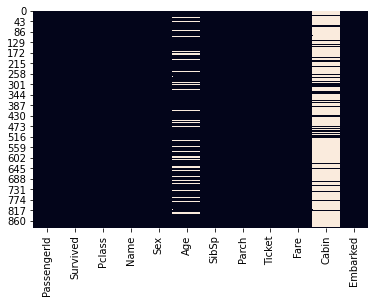

In [9]:
sns.heatmap(train_data.isnull(), cbar=False)

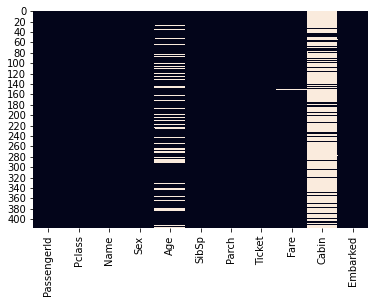

In [10]:
sns.heatmap(test_data.isnull(), cbar=False)

##### check outlier

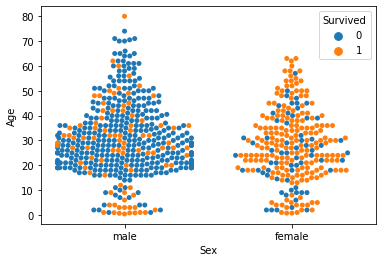

In [11]:
sns.swarmplot(data=train_data, x='Sex', y='Age', hue="Survived")

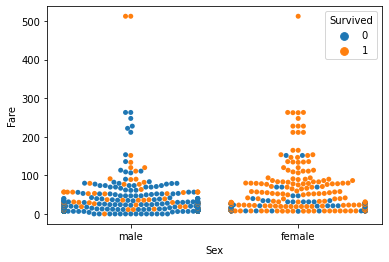

In [12]:
sns.swarmplot(data=train_data, x='Sex', y='Fare', hue="Survived")

### Impute/Remove NaN Values

In [13]:
from sklearn.impute import SimpleImputer

def impute_nan_values(data, column):
    imr = SimpleImputer(missing_values=np.nan, strategy='median')
    print(f"Number of {column} NaN values before impute: {data[column].isnull().sum().sum()}")
    imr = imr.fit(data[[column]])
    data[column] = imr.transform(data[[column]]).ravel()
    print(f"Number of {column} NaN values after impute: {data[column].isnull().sum().sum()}")

def remove_nan_values(data, column):
    print(f"Number of {column} NaN values before impute: {data[column].isnull().sum().sum()}")
    _data = data[data[column].notnull()]
    print(f"Number of {column} NaN values after impute: {_data[column].isnull().sum().sum()}")
    return _data

In [14]:
for column in train_data.columns:
    print(f"{column}: {str(sum(train_data[column].isnull()))} missing values")

impute_nan_values(train_data, 'Age')
train_data = remove_nan_values(train_data, 'Embarked')

PassengerId: 0 missing values
Survived: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 177 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 687 missing values
Embarked: 2 missing values
Number of Age NaN values before impute: 177
Number of Age NaN values after impute: 0
Number of Embarked NaN values before impute: 2
Number of Embarked NaN values after impute: 0


In [15]:
for column in test_data.columns:
    print(f"{column}: {str(sum(test_data[column].isnull()))} missing values")

impute_nan_values(test_data, 'Age')
impute_nan_values(test_data, 'Fare')

PassengerId: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 86 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 1 missing values
Cabin: 327 missing values
Embarked: 0 missing values
Number of Age NaN values before impute: 86
Number of Age NaN values after impute: 0
Number of Fare NaN values before impute: 1
Number of Fare NaN values after impute: 0


### Remove Outliers

In [16]:
"""
Usage of 'Z-score' (z = x – μ / σ) to find outliers
"""
def outliers_z_score(data):
    outliers=[]
    threshold = 6

    mean_y = np.mean(data)
    stdev_y = np.std(data)

    for i in data:
        z_score = (i-mean_y) / stdev_y
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [17]:
# Age feature
age_outliers = outliers_z_score(train_data['Age'])
print(f"Age outliers: {age_outliers}")
for ao in age_outliers:     
    train_data = train_data[train_data.Age != ao]


# Fare feature
fare_outliers = outliers_z_score(train_data['Fare'])
print(f"Fare outliers: {fare_outliers}")
for fo in fare_outliers:     
    train_data = train_data[train_data.Fare != fo]
    
    
# Parch feature
fare_outliers = outliers_z_score(train_data['Parch'])
print(f"Parch outliers: {fare_outliers}")
for po in fare_outliers:     
    train_data = train_data[train_data.Parch != po]

# SibSp feature
sibsp_outliers = outliers_z_score(train_data['SibSp'])
print(f"SibSp outliers: {sibsp_outliers}")
for so in sibsp_outliers:     
    train_data = train_data[train_data.SibSp != so]

Age outliers: []
Fare outliers: [512.3292, 512.3292, 512.3292]
Parch outliers: [6]
SibSp outliers: [8, 8, 8, 8, 8, 8, 8]


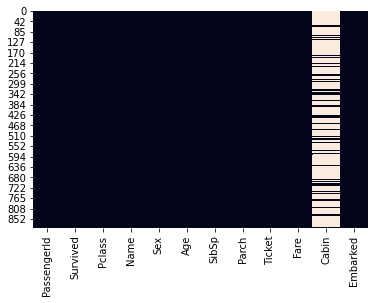

In [18]:
sns.heatmap(train_data.isnull(), cbar=False)

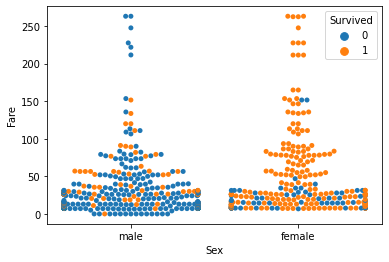

In [19]:
sns.swarmplot(data=train_data, x='Sex', y='Fare', hue="Survived")

### Drop redundant columns

In [20]:
# not going to use these columns to train/test on
train_data.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], inplace=True, axis=1)
test_data.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], inplace=True, axis=1)

### Categorical To Numerical Columns

In [21]:
print(train_data.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_data["Embarked"] = label_encoder.fit_transform(train_data["Embarked"])
train_data["Sex"] = label_encoder.fit_transform(train_data["Sex"])

test_data["Embarked"] = label_encoder.fit_transform(test_data["Embarked"])
test_data["Sex"] = label_encoder.fit_transform(test_data["Sex"])

In [23]:
print(train_data.dtypes)

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


### Train Models

In [24]:
target = train_data['Survived']
train_data.drop(['Survived'], inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.25, random_state=42, shuffle=False)
print(f'Sizes: X_train={X_train.shape}, y_train={y_train.shape}, X_test={X_test.shape}, y_test={y_test.shape}')

# will need this later on for AutoGluon
X_train_with_target = X_train.copy()
X_train_with_target['Survived'] = target

print(f'Sizes: X_train_with_targer={X_train_with_target.shape}')

Sizes: X_train=(658, 7), y_train=(658,), X_test=(220, 7), y_test=(220,)
Sizes: X_train_with_targer=(658, 8)


In [25]:
best_model = None
best_model_name = None
best_model_acc = 0.0

models = []

def validate_model(model_name, model, accuracy):
    global best_model, best_model_name, best_model_acc, models
    
    models.append([model_name, accuracy])

    print()
    print(f"Current accuracy of model {model_name}: {accuracy}")
    print(f"Previous best accuracy of model {best_model_name}: {best_model_acc}")

    if accuracy > best_model_acc:
        print(f"Improved previous accuracy!")
        best_model_acc = accuracy
        best_model = model
        best_model_name = model_name
    else:
        print(f"Did not improve previous accuracy.")

### XGBoost

In [26]:
%%time
from xgboost import XGBClassifier
#warnings.filterwarnings('ignore')
#logging.captureWarnings(True)
#simplefilter(action='ignore', category=FutureWarning)

xgboost_model = XGBClassifier(tree_method='gpu_hist')
xgboost_model.fit(X_train, y_train)
y_preds_xgboost = xgboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_preds_xgboost)
validate_model('xgboost', xgboost_model, accuracy)


Current accuracy of model xgboost: 0.8454545454545455
Previous best accuracy of model None: 0.0
Improved previous accuracy!
CPU times: user 451 ms, sys: 160 ms, total: 612 ms
Wall time: 612 ms


### AutoSklearn

!

In [27]:
%%time
import autosklearn.classification
#warnings.filterwarnings('ignore')
#logging.captureWarnings(True)
#simplefilter(action='ignore', category=FutureWarning)

# set time_left_for_this_task to prevent trail getting stuck (default 3600 seconds)
auto_sklearn_model = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120, n_jobs=-1)

auto_sklearn_model.fit(X_train, y_train)
y_preds_autosklearn = auto_sklearn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_preds_autosklearn)
validate_model('autosklearn', auto_sklearn_model, accuracy)


Current accuracy of model autosklearn: 0.8409090909090909
Previous best accuracy of model xgboost: 0.8454545454545455
Did not improve previous accuracy.
CPU times: user 52 s, sys: 3.37 s, total: 55.3 s
Wall time: 2min


### TPOT

In [30]:
!pip install tpot

     |████████████████████████████████| 92kB 5.2MB/s 
     |████████████████████████████████| 166.7MB 93kB/s 
     |████████████████████████████████| 163kB 53.4MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=3f5135da8f23109f3aba586369f40b11b6054489a99f2d1c0543f9c9d65fc91d
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [31]:
%%time
from tpot import TPOTClassifier
warnings.filterwarnings('ignore')
logging.captureWarnings(True)
simplefilter(action='ignore', category=FutureWarning)

# set generations and population_size to prevent too long search (default 100 both)
tpot_classifier = TPOTClassifier(generations=10, population_size=10, verbosity=2, n_jobs=-1)
tpot_classifier.fit(X_train, y_train)
y_preds_tpot = tpot_classifier.predict(X_test)

tpot_classifier.export('tpot_pipeline.py')

accuracy = accuracy_score(y_test, y_preds_tpot)
validate_model('tpot', tpot_classifier, accuracy)


Generation 1 - Current best internal CV score: 0.8297825584085127

Generation 2 - Current best internal CV score: 0.8297825584085127

Generation 3 - Current best internal CV score: 0.8297825584085127

Generation 4 - Current best internal CV score: 0.8297825584085127

Generation 5 - Current best internal CV score: 0.8297825584085127

Generation 6 - Current best internal CV score: 0.8297825584085127

Generation 7 - Current best internal CV score: 0.8297825584085127

Generation 8 - Current best internal CV score: 0.8297825584085127

Generation 9 - Current best internal CV score: 0.8297825584085127

Generation 10 - Current best internal CV score: 0.8298056904927135

Best pipeline: ExtraTreesClassifier(SelectPercentile(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), percentile=63), bootstrap=True, criterion=gini, max_features=0.25, min_samples_leaf=1, min_samples_split=5, n_estimators=100)

Current accuracy of model tpot: 0.85
Previous best accuracy 

###AutoGluon

In [ ]:
%%time
from autogluon.tabular import TabularPredictor as task
warnings.filterwarnings('ignore')
logging.captureWarnings(True)
simplefilter(action='ignore', category=FutureWarning)

save_path = 'titanic'
# autogluon needs target in the training_data
predictor = task(label='Survived', path=save_path).fit(X_train_with_target)
y_preds_autogluon = predictor.predict(X_test)

accuracy = accuracy_score(y_test, y_preds_autogluon)
validate_model('autogluon', predictor, accuracy)

print(predictor.leaderboard())

### H2O

In [34]:
!pip install h2o

     |████████████████████████████████| 164.8MB 77kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.4-py2.py3-none-any.whl size=164871668 sha256=5ab6b1a5b77df3ef729c4d26d7bf00fa5b2c4cf49ce9edff38c3081f0b7aefcc
  Stored in directory: /root/.cache/pip/wheels/67/76/54/89d7711536d5bb0d010bf35a34deca3eddc757efba78dbc74f
Successfully built h2o


In [35]:
%%time
import h2o
from h2o.sklearn import H2OAutoMLClassifier
warnings.filterwarnings('ignore')
logging.captureWarnings(True)
simplefilter(action='ignore', category=FutureWarning)

h2o.init()

# set max_runtime_secs to prevent too long search (default 3600)
aml = H2OAutoMLClassifier(max_runtime_secs=120)

aml.fit(X_train, y_train.values)
y_preds_h2o = aml.predict(X_test)

accuracy = accuracy_score(y_test, y_preds_h2o)
validate_model('H2OautoML', aml, accuracy)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprnsh9o4z
  JVM stdout: /tmp/tmprnsh9o4z/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprnsh9o4z/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_unknownUser_sjq3fd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.174 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%

Current accuracy of model H2OautoML: 0.8454545454545455
Previous best accuracy of model tpot: 0.85
Did not improve previous accuracy.
CPU times: user 21.3 s, sys: 540 ms, total: 21.8 s
Wall time: 1min 52s


### MLJarSupervised

In [ ]:
pip3 install mljar-supervised
pip3 install matplotlib==3.1.3

In [ ]:
%%time
from supervised.automl import AutoML
warnings.filterwarnings('ignore')
logging.captureWarnings(True)
simplefilter(action='ignore', category=FutureWarning)

# https://github.com/mljar/mljar-supervised#available-modes-books
# set total_time_limit to prevent too long search (default 3600 seconds)
# features_selection causes issues with xgboost on gpu
automl = AutoML(
    mode="Compete",
    stack_models=True,
    train_ensemble=True,
    total_time_limit=120,
    features_selection=False
)

automl.fit(X_train, y_train)
y_preds_mljar = automl.predict(X_test)

accuracy = accuracy_score(y_test, y_preds_mljar)
validate_model('mljar-supervised', automl, accuracy)

automl.get_leaderboard()

### Result

In [ ]:
models_df = pd.DataFrame(models, columns=['model_name', 'accuracy'])
models_df.sort_values(by=['accuracy'], ascending=False, inplace=True)
models_df = models_df.reset_index(drop=True)
models_df

In [ ]:
print(best_model_name)
print(best_model)
print(best_model_acc)